# Question 1

The goal of simple linear regression is to find a linear equation that models how a dependent variable(the outcome) changes as an independent variable changes(the predictor). In the linear equation the slope is the change in the dependent variable for one unit change in the independent variable. This all just prediction so linear regression also has a value, ϵ, that is the error between the predicted and actual values of y. With simple linear regression we assume that the errors are normally distributed and this suggests that for one independent variable the distribution of the dependent variable will be a normal distribution. 

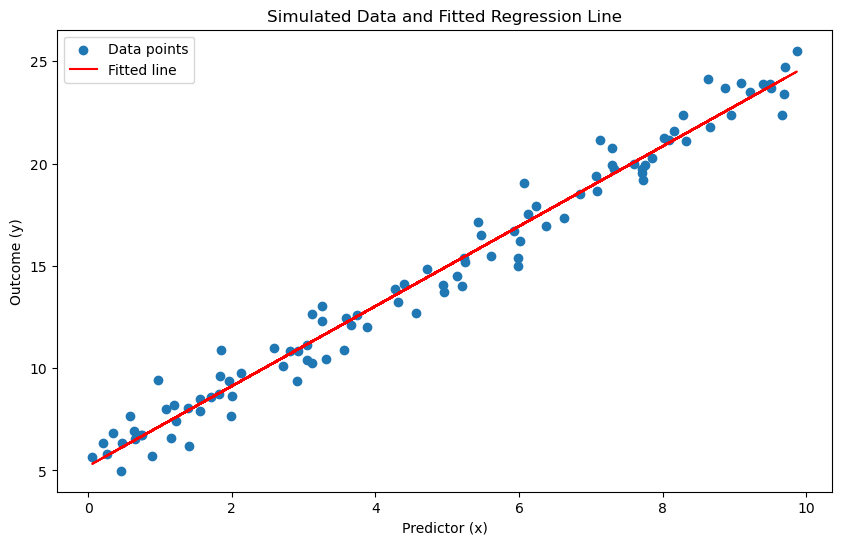

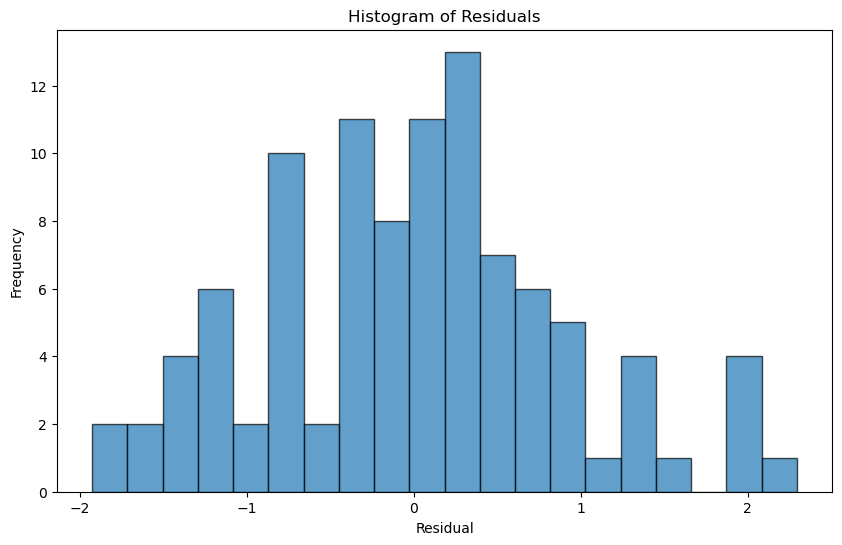

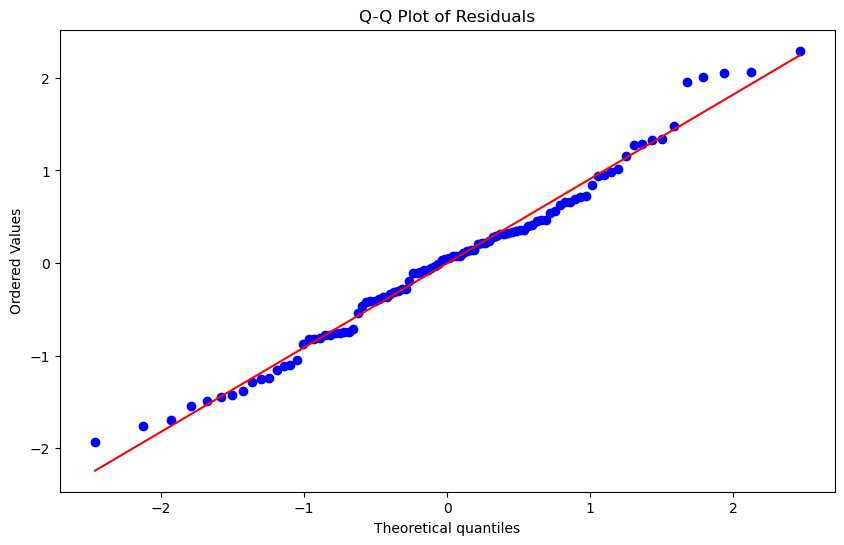

Shapiro-Wilk test p-value: 0.2984


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Simulate data
np.random.seed(42)  # For reproducibility

# Generate 100 data points for the predictor variable (e.g., years of experience)
x = np.random.rand(100) * 10  # Random values between 0 and 10

# True slope and intercept (we can choose any values)
beta_0 = 5  # Intercept
beta_1 = 2  # Slope

# Generate the error term from a normal distribution (mean 0, variance 1)
epsilon = np.random.normal(0, 1, 100)

# Generate the dependent variable (outcome), which includes the linear relationship + error
y = beta_0 + beta_1 * x + epsilon

# 2. Fit a simple linear regression
# The coefficients (beta_0 and beta_1) can be estimated by fitting the data
X = np.vstack([np.ones_like(x), x]).T  # Add a column of ones for the intercept term
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y  # OLS estimation

# Extract the estimated intercept and slope
estimated_beta_0 = beta_hat[0]
estimated_beta_1 = beta_hat[1]

# 3. Predicted values and residuals
y_pred = estimated_beta_0 + estimated_beta_1 * x
residuals = y - y_pred  # Residuals = actual - predicted

# 4. Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data points')
plt.plot(x, y_pred, color='red', label='Fitted line')
plt.title('Simulated Data and Fitted Regression Line')
plt.xlabel('Predictor (x)')
plt.ylabel('Outcome (y)')
plt.legend()
plt.show()

# 5. Plot the residuals to check for normality
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot to check if residuals are normally distributed
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 6. Perform a statistical test (e.g., Shapiro-Wilk test for normality)
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue:.4f}')


Summary: 
Simple Linear Regression:
It's a statistical method that models the relationship between a predictor (independent variable) and an outcome (dependent variable) using a straight line.
Normal Distribution in Simple Linear Regression:
The model assumes that the error term follows a normal distribution. This implies that the dependent variable y, for any given value of x, is also normally distributed around the predicted value. After fitting the regression line, the residuals (the differences between the actual and predicted values of y) are assumed to follow a normal distribution.
Demonstration with Code:
Using Python (numpy, scipy.stats, and matplotlib), we simulated data with a theoretical linear relationship, added normally distributed error terms, and fit a simple linear regression. We then checked whether the residuals were normally distributed using a histogram, a Q-Q plot, and a Shapiro-Wilk test for normality.
Confirmation of Theoretical Model:
We discussed how this demonstration is a theoretical model because it relies on predefined assumptions about the data (e.g., normally distributed errors, linear relationship).

# Question 2


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4065.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           1.35e-81
Time:                        00:48:21   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2151      0.170     30.625      0.0

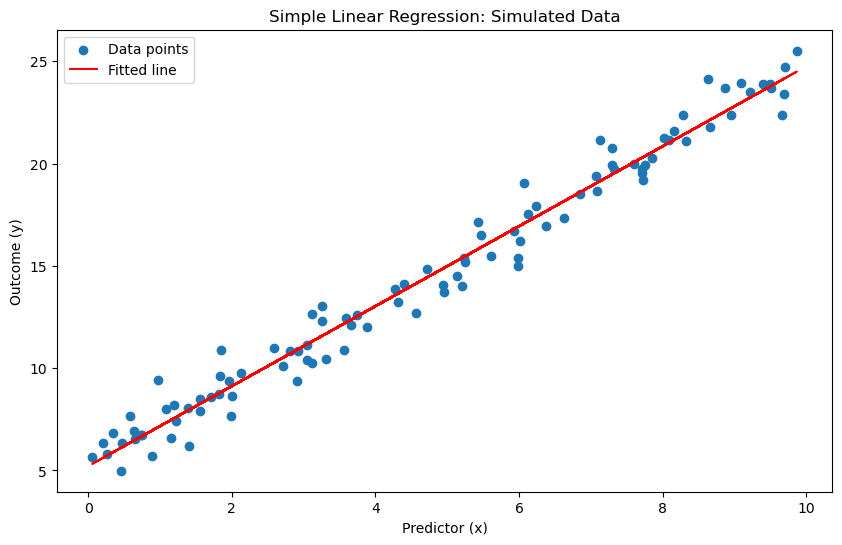

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 1. Simulate data
np.random.seed(42)  # For reproducibility

# Generate 100 random x values (e.g., years of experience)
x = np.random.rand(100) * 10  # Values between 0 and 10

# Set the true slope and intercept
beta_0 = 5  # Intercept
beta_1 = 2  # Slope

# Generate error term from a normal distribution
epsilon = np.random.normal(0, 1, 100)

# Generate the dependent variable y
y = beta_0 + beta_1 * x + epsilon

# Create a DataFrame for analysis
data = pd.DataFrame({'x': x, 'y': y})

# 2. Fit the Simple Linear Regression model using statsmodels
# Use the formula 'y ~ x' to specify that y depends on x
model = smf.ols('y ~ x', data=data).fit()

# Print the summary of the regression results
print(model.summary())

# 3. Visualize the fitted regression model
# Plot the original data points
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], label='Data points')

# Plot the regression line using the model's predicted values
plt.plot(data['x'], model.fittedvalues, color='red', label='Fitted line')

# Add labels and title
plt.title('Simple Linear Regression: Simulated Data')
plt.xlabel('Predictor (x)')
plt.ylabel('Outcome (y)')
plt.legend()

# Show the plot
plt.show()


# Question 3 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4065.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           1.35e-81
Time:                        00:59:17   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2151      0.170     30.625      0.0

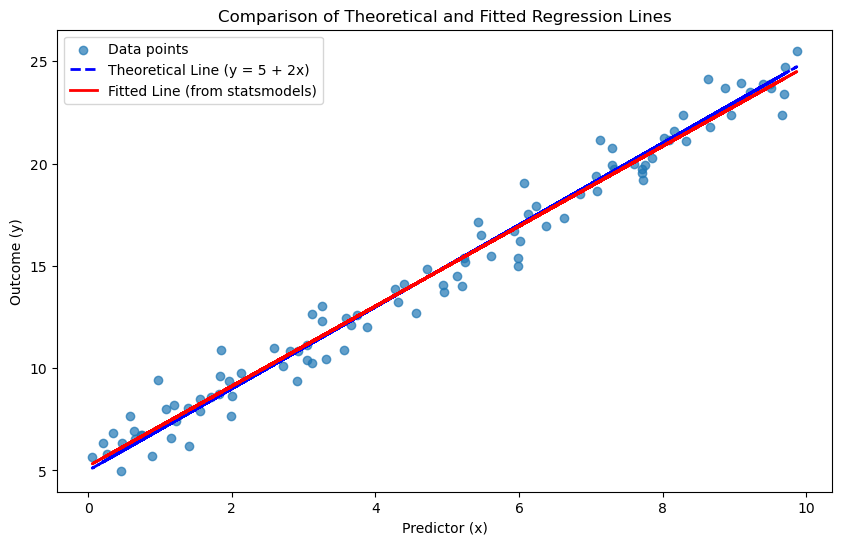

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 1. Simulate data
np.random.seed(42)  # For reproducibility

# Generate 100 random x values (e.g., years of experience)
x = np.random.rand(100) * 10  # Values between 0 and 10

# Set the true slope and intercept
beta_0 = 5  # True intercept
beta_1 = 2  # True slope

# Generate error term from a normal distribution
epsilon = np.random.normal(0, 1, 100)

# Generate the dependent variable y
y = beta_0 + beta_1 * x + epsilon

# Create a DataFrame for analysis
data = pd.DataFrame({'x': x, 'y': y})

# 2. Manually calculate the theoretical regression line (without the error term)
y_theoretical = beta_0 + beta_1 * x  # This is the theoretical line y = 5 + 2x

# 3. Fit the Simple Linear Regression model using statsmodels
model = smf.ols('y ~ x', data=data).fit()

# Print the summary of the regression results
print(model.summary())

# 4. Visualize the fitted regression model with both lines
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the original data points
plt.scatter(data['x'], data['y'], label='Data points', alpha=0.7)

# Plot the manually calculated theoretical regression line
plt.plot(data['x'], y_theoretical, color='blue', linestyle='--', label='Theoretical Line (y = 5 + 2x)', linewidth=2)

# Plot the fitted regression line from statsmodels
plt.plot(data['x'], model.fittedvalues, color='red', label='Fitted Line (from statsmodels)', linewidth=2)

# Add labels and title
plt.title('Comparison of Theoretical and Fitted Regression Lines')
plt.xlabel('Predictor (x)')
plt.ylabel('Outcome (y)')
plt.legend()

# Ensure that the plot is shown correctly
plt.show()



The theoretical line is derived using the actual slope and intercept values from the entire data frame and represents the ideal relationship between the predictor and the outcome without any variability. The fitted line uses the given sample data to estimate the slope and intercept for the equation, so the fitted line includes variability. While the fitted line is always known the theoretical model is usually unknown. Comparing the theoretical line and the fitted line helps us see how the simple linear regression model is affected by varability in the data. It can also help us see how accurate the theoretical model is when compared with the model that uses actual data. In this case the theoretical line comes very close to the fitted line which means that any variability in the sample isn't having much affect on the model.

Summary:
Simple Linear Regression Model:

We explored the components of a theoretical simple linear regression model, including the predictor variable (x), outcome variable (y), slope and intercept coefficients, and the error term.
Code for Simple Linear Regression:
We provided code to simulate data based on a theoretical simple linear regression model, fit a regression line using statsmodels, and visualize the results.
Comparison of Regression Lines:
We discussed the purpose of comparing the theoretical regression line (ideal relationship without noise) and the fitted regression line (based on actual data), highlighting their differences in definition, representation, purpose, sensitivity to noise, and interpretation of coefficients.
Combined Visualization:
We combined the two lines into one plot, displaying both the theoretical line and the fitted line from the regression model on the same graph for visual comparison. This allows us to assess how well the model captures the true relationship and the effects of random variability in the data.
Purpose of Comparison:
The comparison aids in evaluating model accuracy, understanding variability, assessing residuals, and communicating results effectively.

# Question 4

fitted_model.fittedvalues are derived using the coefficients from fitted_model.summary().tables[1]. These coefficients are estimated from the sample data using statistical methods like Ordinary Least Squares regression. Ordinary Least Squares is a method that finds the line of best fit. The coefficients are the slopes at specific predictor values and the y-intercept. These coefficients are applyed into the simple linear regression formula to find the fitted values. This is different from how it would happen with a theoretical model because the theoretical model wouldn't use actual data to find a fitted line.

Summary: Fitted Values from a Regression Model:
The fitted values are predictions made by the regression model using the estimated coefficients (slope and intercept) from the data.
These coefficients are shown in the model summary, and the fitted values are calculated by applying these coefficients to the data.
Comparing the Theoretical and Fitted Models:
The theoretical model uses fixed coefficients that you assume are correct (e.g., y=5+2x).
The fitted model uses coefficients estimated from real data, which may include noise or errors.
Key Differences:
Theoretical models assume a perfect relationship, while fitted models handle real-world data that includes variability (random noise).
Theoretical coefficients are set in advance, while fitted coefficients are calculated from the data.

# Question 5
The line chosen based on OLS is the one where the differences between the predicted values and the observed values are the closest together. It is the "line of best fit" between the predicted and the observed data. The distances are squared to avoid negative values so that the positive and the negative dont cancel out and to make uncommon differences in the data more apparent.

Summary:
OLS Line: The line chosen by Ordinary Least Squares (OLS) minimizes the sum of the squared differences (residuals) between observed and predicted values, giving the best fit.

Why Squared Residuals:
Avoid Negative Values: Squaring residuals prevents positive and negative errors from canceling out.
Emphasize Larger Errors: Squaring makes larger errors stand out more, helping the model focus on minimizing bigger deviations from the true values.

# Question 6
The numerator in the first expression is the variance between the Y data and the fitted model while the denominator is the variance in the Y data as a whole. This expressions will give the proportion of variation in the outcome based off of the fitted model. Therefore the second expression measures that accuracy because the r value is what the expression above measures, the proportion of variance between Y and the fitted model. This second expression represents the accuracy of the line to minimize the disttance between the line and every data point. This expression, np.corrcoef(Y,fitted_model.fittedvalues)[0,1]^2, is going to capture the correlation between between Y and the fitted model. This value will be very close to the r-squared value for the fitted model since the first and third expressions are almost the same. The fourth expression, np.corrcoef(Y,x)[0,1]^2, is going to find the correlation between X and Y. This last expression will also find the variance in Y but the big difference is that it won't be deendent on the fitted model, so this expression will also give a type of r-squared value but it will be different from the others because it will be based off of X and Y not the fitted model and Y.

Summary:
Expressions for R-squared:
fitted_model.rsquared: Represents R-squared, measuring how much of y's variance is explained by the model.
np.corrcoef(y, x)[0,1]^2: Measures the squared correlation between y and x, showing the direct linear relationship without a model.
np.corrcoef(y, fitted_model.fittedvalues)[0,1]^2: Squared correlation between observed y values and model predictions, which closely matches R-squared.
1 - (sum of squared residuals / total sum of squares): Calculates R-squared by comparing the model’s error to the total variation in y.
Conclusion:
All expressions reflect different ways of measuring how much of y’s variation is explained by the predictor x or the model, with R-squared as the key metric of model accuracy.

# Link to chatbot for questions 1-6 to be updated after continued use:https://chatgpt.com/share/671d4dc1-20f4-800d-a777-cb7b0aa96fde

# Question 7
To use simple linear regression we assume that the data is linear. In this example the data is not linear, the crop yield increases exponentially as more fertilizer is used. This might mean that the errors are not normally distributed and do not all share the same value of variance. In either case this creates a graph that wont work with simple linear regression.

# Link to chat for question 7: https://chatgpt.com/share/671861bb-0f34-800d-bfa4-721b9ba1d83d

# Question 8
Null hypothesis: The simple linear regression slope value is 0

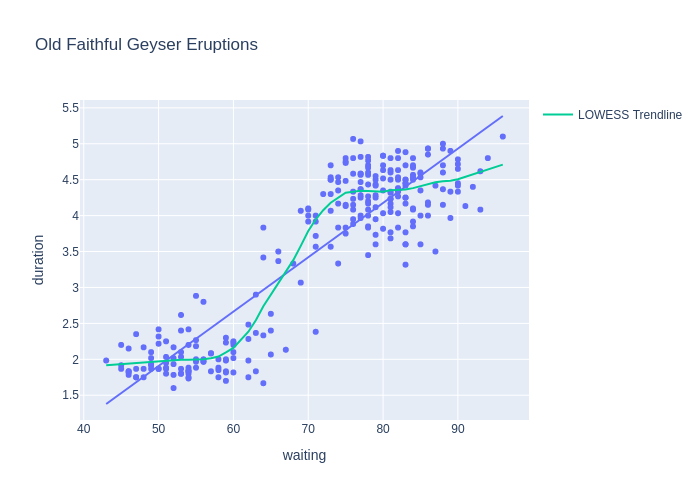

In [11]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# Load Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])

# Add the LOWESS smoothed line to the plot
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")  # Use PNG renderer for GitHub or MarkUs submissions


In [12]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        23:11:48   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Given that the waiting coefficient is 0.0756 with a p-value of 0.000 I think that the null hypothesis can be rejected since a slope value 0.0756 is relatively far away from a slope value of 0 considering that the slope value is between 0 and 1. We can also see the p value and since it is such a small value we can reject the null hypothesis with strong evidence.

Summary:
Linear Association in Simple Regression: We discussed that in the context of simple linear regression, the slope is the main parameter that shows if there is no linear association. If the slope is zero, there is no linear relationship.

Correlation Coefficient: We also confirmed that the r-value (correlation coefficient) is relevant. An r-value of 0 indicates no linear association between the variables.

# Question 9

Within the range of short term values in the data, we can see that as the wait times get relatively longer there is no significant change in the duration. We can therefore conclude that for short term values there is no relationship between wait time and duration. We can check this with the code.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


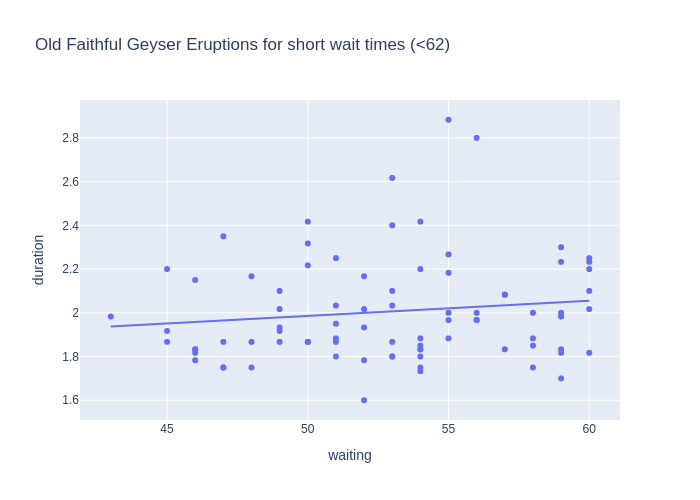

In [13]:
import plotly.express as px

short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


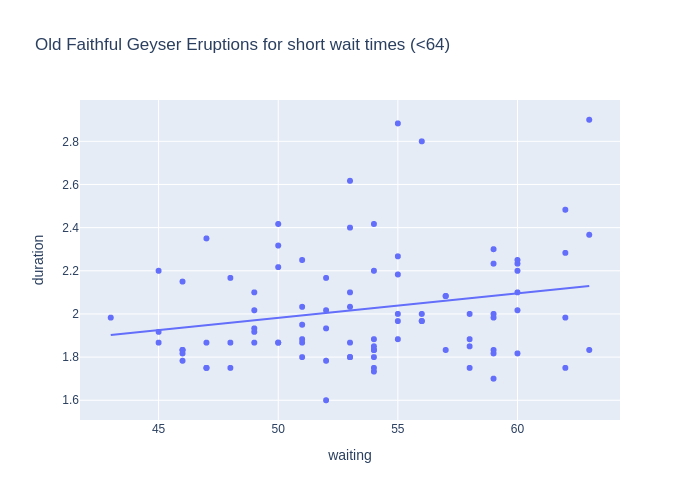

In [14]:
import plotly.express as px

short_wait_limit = 64
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


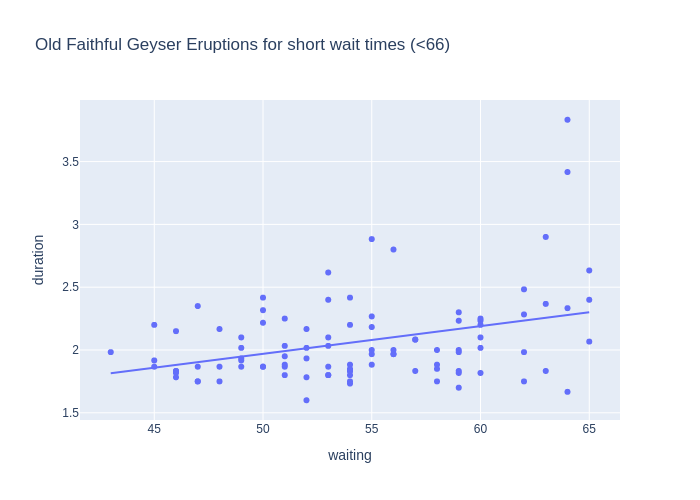

In [15]:
import plotly.express as px

short_wait_limit = 66 
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Within the context of short wait times(times smaller than 62 seconds) there is not enough evidence to reject the null hypothesis that there is no relationship between wait times and duration. In the code that checks for the relationship between wait time and duration when the value is smaller than 62 the p value is bigger than 0.05 which shows that before 62 seconds there is no relationship since there is not evidence to reject the null. After 62 seconds the p values reduce exponentially and it can be seen that there is a relationship between wait time and duration because at around 63 seconds the duration increases based off of the wait time. The difference is that this only starts at 63 seconds so anything before doesn't represent this relationship.

Summary:
Analysis of Short Wait Times: You provided code to analyze the relationship between duration and waiting for short wait times (less than specified limits of 62, 64, or 66). I explained how to interpret the p-value from the regression output, which tests the null hypothesis that there is no linear relationship. If the p-value is below a chosen significance level (e.g., 0.05), it indicates significant evidence against the null hypothesis, suggesting a linear relationship.

Regression Output Interpretation: I mentioned that the p-value and slope coefficient from the output of the regression model (smf.ols(...).fit().summary().tables[1]) are essential for determining the strength and significance of the relationship in the filtered dataset.

Attempted Code Execution: I tried running the code to show the p-value for the subset with short_wait_limit = 62, but the dataset couldn't be loaded due to a network restriction.

Explanation of the P-Value in Output: I highlighted that the p-value can be found under the column labeled P>|t| in the row for waiting in the regression output table. This value indicates whether the relationship between waiting and duration is statistically significant.

# Question 10

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


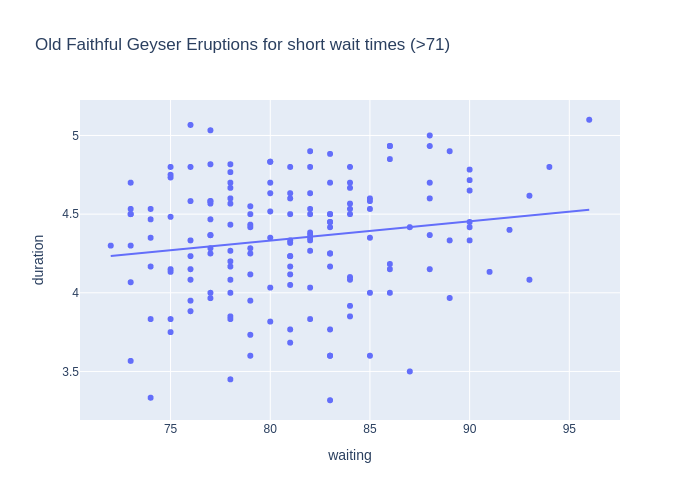

In [16]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

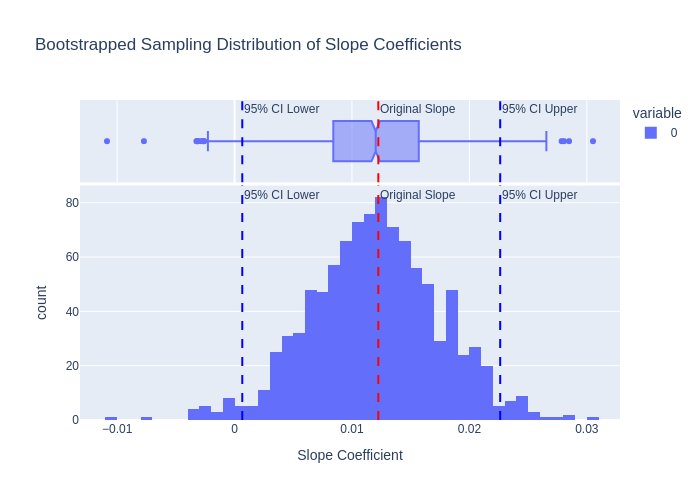

Original Slope Coefficient: 0.0122
95% Bootstrapped Confidence Interval: [0.0007, 0.0226]
Is 0 within 95% CI? No
Original P-value: 0.0381
Simulated P-value: 0.0430


In [17]:
#create fitted Simple Linear Regression models for boostrap samples
#collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models
#simulates samples from a specific simple linear regression model
#uses these to collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of "no linear association
#checks if 0 is within the confidence interval

import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf

# Parameters for bootstrapping and simulation
num_bootstrap_samples = 1000  # Number of bootstrap iterations
num_simulated_samples = 1000  # Number of simulations under null hypothesis
sample_size = 160  # Size of each simulated sample
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit

# Original regression for comparison
original_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
original_slope = original_model.params['waiting']
original_p_value = original_model.pvalues['waiting']

# Collect slope coefficients from bootstrapped samples
bootstrapped_slopes = []

for _ in range(num_bootstrap_samples):
    # Bootstrap sampling from the data
    bootstrap_sample = old_faithful[long_wait].sample(frac=1, replace=True)
    bootstrap_model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slopes.append(bootstrap_model.params['waiting'])

# Create 95% confidence interval for the bootstrapped slopes
ci_lower = np.percentile(bootstrapped_slopes, 2.5)
ci_upper = np.percentile(bootstrapped_slopes, 97.5)

# Check if 0 is contained in the confidence interval
contains_zero = ci_lower <= 0 <= ci_upper

# Generate simulated samples under null hypothesis of no linear association
simulated_slopes = []

mean_duration = old_faithful[long_wait]['duration'].mean()
std_duration = old_faithful[long_wait]['duration'].std()

for _ in range(num_simulated_samples):
    simulated_duration = mean_duration + std_duration * np.random.randn(sample_size)
    simulated_data = pd.DataFrame({
        'waiting': old_faithful[long_wait]['waiting'].sample(n=sample_size, replace=True).values,
        'duration': simulated_duration
    })
    simulated_model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    simulated_slopes.append(simulated_model.params['waiting'])

# Calculate the proportion of simulated slopes greater than the observed slope for a simulated p-value
simulated_p_value = np.mean(np.abs(simulated_slopes) >= np.abs(original_slope))

# Visualize the bootstrapped sampling distribution
fig = px.histogram(
    bootstrapped_slopes, nbins=50, 
    title='Bootstrapped Sampling Distribution of Slope Coefficients',
    labels={'value': 'Slope Coefficient'}, marginal='box'
)
fig.add_vline(x=original_slope, line_dash="dash", line_color="red", annotation_text="Original Slope")
fig.add_vline(x=ci_lower, line_dash="dash", line_color="blue", annotation_text="95% CI Lower")
fig.add_vline(x=ci_upper, line_dash="dash", line_color="blue", annotation_text="95% CI Upper")
fig.show(renderer="png")

# Output results
print(f"Original Slope Coefficient: {original_slope:.4f}")
print(f"95% Bootstrapped Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Is 0 within 95% CI? {'Yes' if contains_zero else 'No'}")
print(f"Original P-value: {original_p_value:.4f}")
print(f"Simulated P-value: {simulated_p_value:.4f}")


Summary:
Initial Code: You provided code to fit a linear regression model for waiting times greater than 71 and asked for enhancements to analyze bootstrapped samples.

Bootstrap Sampling: I provided code to create bootstrap samples, fit linear regression models, and collect the slope coefficients. We also visualized the distribution of these coefficients.

Simulating Under Null Hypothesis: I added code to simulate samples assuming no linear relationship (random noise) and calculated a simulated p-value.

Confidence Interval Check: You wanted to check if 0 was within the 95% confidence interval to assess if there was a significant linear relationship. I updated the code to include this check.

Final Output: The final code checks if 0 is in the confidence interval and compares the simulated p-value with the original model's p-value.

# Question 11

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


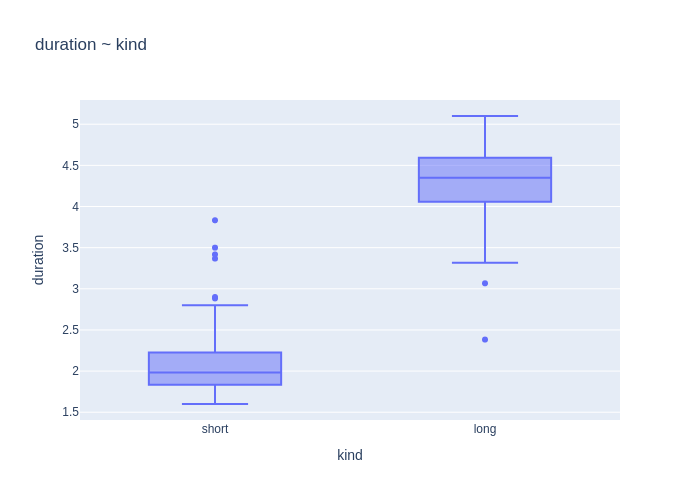

In [18]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The difference between this model and the other models is that this model can see that the main difference comes from the length of waiting times. It doesn't make much sense to have short and long data seperated because comparing them is where all the good info is found. Therefore this model takes the two sections of data and directly compares them. By looking at both of them together we get a very small p value when using hypothesis testing to check the null hypothesis of "no difference between groups" which means there is a lot of evidence that the two groups are actually not the same. This is reflected in the graph. Another difference is the null hypothesis that is being tested. In the other models we are testing for a relationship between wait time and duration but in this model we are cheking to see if there is a difference between the means of duration for short wait times and long wait times.

# Question 12

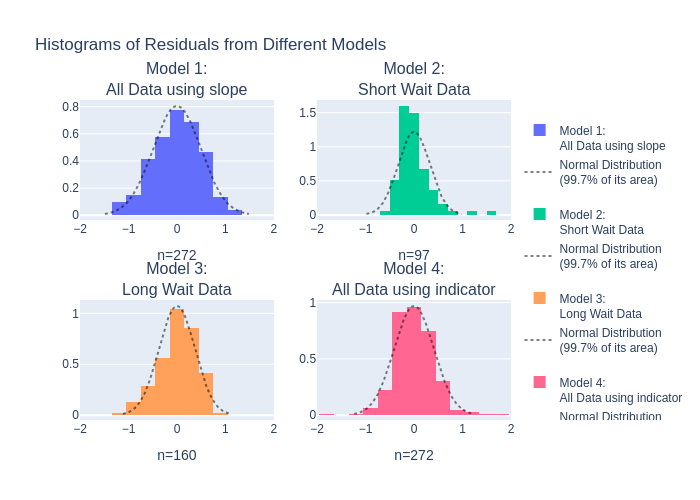

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Model 1 which shows all data using slope suggests that the distribution of error terms is normal because it has the shape closest to a normal distribution bell curve. Model 2 has outliers, model 3 is uneven on the right and left, and 4 has a bit of skew on either side so none of them represent a normal distribution of error as well as model 1.

Summary:
Identify which histograms suggest that the distribution of residuals (error terms) is plausibly normal.
Explain why the other histograms do not support this assumption by discussing issues like skewness, outliers, kurtosis, or multimodality.

# Question 13

**Permutation Test**

Observed Difference in Means: -2.3385
P-value from Permutation Test: 0.0000


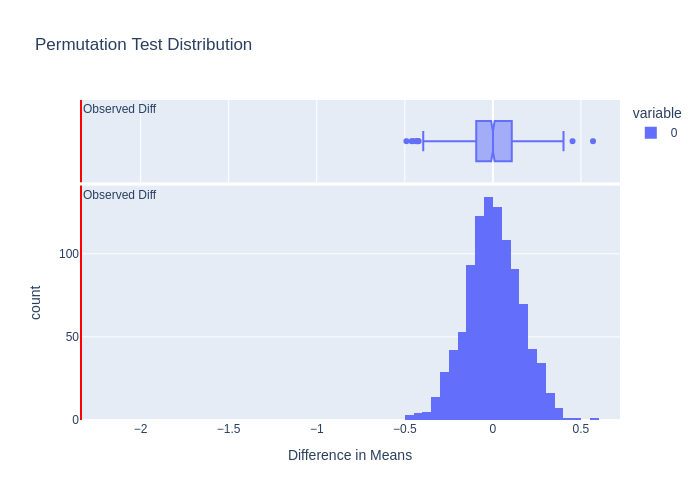

In [20]:
import numpy as np
import pandas as pd

# Define the short and long wait time samples
short_wait_limit = 62  # You can adjust this limit
long_wait_limit = 71
short_wait = old_faithful[old_faithful['waiting'] < short_wait_limit]['duration']
long_wait = old_faithful[old_faithful['waiting'] > long_wait_limit]['duration']

# Observed difference in means
observed_diff = np.mean(short_wait) - np.mean(long_wait)

# Combine both groups to permute
combined_data = np.concatenate([short_wait, long_wait])
num_permutations = 1000  # Number of permutations
permuted_diffs = []

# Perform the permutation test
for _ in range(num_permutations):
    np.random.shuffle(combined_data)
    permuted_short = combined_data[:len(short_wait)]
    permuted_long = combined_data[len(short_wait):]
    permuted_diff = np.mean(permuted_short) - np.mean(permuted_long)
    permuted_diffs.append(permuted_diff)

# Calculate the p-value (two-tailed test)
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

# Output results
print(f"Observed Difference in Means: {observed_diff:.4f}")
print(f"P-value from Permutation Test: {p_value:.4f}")

# Optional: Visualize the permutation distribution
import plotly.express as px
fig = px.histogram(permuted_diffs, nbins=50, title="Permutation Test Distribution",
                   labels={'value': 'Difference in Means'}, marginal='box')
fig.add_vline(x=observed_diff, line_color="red", annotation_text="Observed Diff")
fig.show(renderer="png")


The permutation test rejects the null hypothesis and shows that there is a difference in the means of short term and long term values


**Bootstrap Confidence Interval**

95% Bootstrap Confidence Interval for the Difference in Means: [-2.4114, -2.2641]
Does the 95% CI contain 0? No


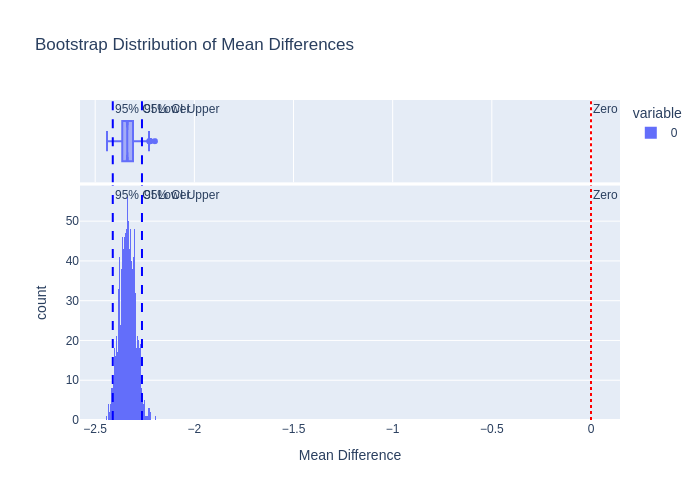

In [21]:
import numpy as np
import pandas as pd

# Define the short and long wait time samples
short_wait_limit = 62  # You can adjust this limit
long_wait_limit = 71
short_wait = old_faithful[old_faithful['waiting'] < short_wait_limit]['duration']
long_wait = old_faithful[old_faithful['waiting'] > long_wait_limit]['duration']

# Number of bootstrap samples
num_bootstrap_samples = 1000
bootstrapped_mean_differences = []

# Perform bootstrapping
for _ in range(num_bootstrap_samples):
    # Bootstrap samples from each group
    boot_short = np.random.choice(short_wait, size=len(short_wait), replace=True)
    boot_long = np.random.choice(long_wait, size=len(long_wait), replace=True)
    # Calculate the mean difference for this bootstrap sample
    mean_diff = np.mean(boot_short) - np.mean(boot_long)
    bootstrapped_mean_differences.append(mean_diff)

# Calculate the 95% confidence interval
ci_lower, ci_upper = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

# Output results
print(f"95% Bootstrap Confidence Interval for the Difference in Means: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Check if 0 is within the confidence interval
contains_zero = ci_lower <= 0 <= ci_upper
print(f"Does the 95% CI contain 0? {'Yes' if contains_zero else 'No'}")

# Optional: Visualize the bootstrap distribution
import plotly.express as px
fig = px.histogram(bootstrapped_mean_differences, nbins=50, title="Bootstrap Distribution of Mean Differences",
                   labels={'value': 'Mean Difference'}, marginal='box')
fig.add_vline(x=ci_lower, line_color="blue", annotation_text="95% CI Lower", line_dash="dash")
fig.add_vline(x=ci_upper, line_color="blue", annotation_text="95% CI Upper", line_dash="dash")
fig.add_vline(x=0, line_color="red", annotation_text="Zero", line_dash="dot")
fig.show(renderer="png")


The bootstrap confidence interval does not contain 0 so we can reject the null hypothesis.

The sampling approach for a permutation test is to combine the data from the two samples, shuffle, and then split them into random samples to create a sampling distribution of the differences in means. For the bootstrap confidence interval you sample with replacement to create many random samples and find the difference in means for each and then uses the distribution to form a confidence interval.

The similarities between these two methods and the indicator variable based model are that both can find the differences in the mean and can return specific statistics like the p-value. The differences are that the indicator varable model relies on the assumption that errors are normally distributed and it uses a variable to distinguish between the groups which enables it to find results based off of group membership.

Summary: 
Permutation Test: I provided code to shuffle and split data to test if the mean difference between short and long wait times is significant, using a p-value.
Bootstrap Confidence Interval: I gave code to resample data, calculate mean differences, and find a 95% confidence interval to estimate the range of the true mean difference.
Comparison: We compared the permutation test, bootstrap method, and regression with an indicator variable. The main difference is that permutation and bootstrap are non-parametric, while regression relies on assumptions.
Clarification: I explained that regression uses a dummy variable to compare groups and provides statistical outputs like p-values and confidence intervals.

# Link for questions 8-13: https://chatgpt.com/share/672ae655-5e74-800d-94ef-9a0e60ef7b00